In [1159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [1160]:
price_dataset=pd.read_csv(r"C:\Users\Hp\Desktop\Housing price\train.csv")

In [1161]:
#Checking shape of the Data
price_dataset.shape

(1460, 81)

In [1162]:
#Checking the info of the Data
price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1163]:
#Checking for duplicates
price_dataset.loc[price_dataset.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There is no duplicate row present in the Dataset.

## Step 2: Data Cleaning

Removing/Imputing NaN values in Categorical and continous attributes

In [1164]:
null_value_table=pd.DataFrame((price_dataset.isna().sum()/price_dataset.shape[0])*100).sort_values(0,ascending=False )
null_value_table.columns=['null percentage']
null_value_table[null_value_table['null percentage']>0]

,null percentage
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945


#Dropping the columns those have null value more than 95% null value as they are not going to provide any information in our prediction.


In [1165]:
price_dataset=price_dataset.drop(['Alley','PoolQC','MiscFeature'],axis='columns')

Imputing continous variable with median value and categorical variable with mode value.

In [1166]:
def nullvalue_function(base_dataset):

    # Printing the shape of the data 
    
    print(base_dataset.shape)
    
    # Converting  into percentage table
    
    null_value_table=pd.DataFrame((base_dataset.isna().sum()/base_dataset.shape[0])*100).sort_values(0,ascending=False )
    
    null_value_table.columns=['null percentage']
    
    # Defining the threashold values 
    
    print(null_value_table[null_value_table['null percentage']>0].index)
    
    # Replace the null values with median() # continous variables 
    for i in base_dataset.describe().columns:
        base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
        
    # Replace the null values with None # categorical variables 
    for i in price_dataset.describe(include='object').columns:
        price_dataset[i].fillna('None',inplace=True)
    print(base_dataset.shape)
    
    return base_dataset

In [1167]:
price_dataset=nullvalue_function(price_dataset)

(1460, 78)
Index(['Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure',
       'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType',
       'MasVnrArea', 'Electrical'],
      dtype='object')
(1460, 78)


In [1168]:
null_value_table=pd.DataFrame((price_dataset.isna().sum()/price_dataset.shape[0])*100).sort_values(0,ascending=False )
null_value_table.columns=['null percentage']
null_value_table[null_value_table['null percentage']>0]

,null percentage


In [1169]:
price_dataset.loc[:,price_dataset.nunique()<20].select_dtypes(include = ['float64','int64']).head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2,2008
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5,2007
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9,2008
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2,2006
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12,2008


Checking Outliers For Contionuos Variables

In [1170]:
def plot_Outlier(var_list):
#Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(4,4,var_list.index(var)+1)
        ax=sns.boxplot(x = price_dataset[var])   
    plt.show()

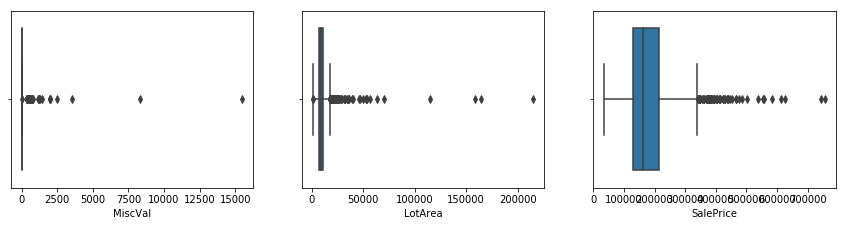

In [1171]:
plot_Outlier(['MiscVal', 'LotArea', 'SalePrice'])

There are outliers in continuos variable of the dataset. But we not treating all these variables as we will be missing very crucial information. so instead we will be transforming the target variable

#### For all the year columns we will try to convert with the age where we are going to fill these columns with number.

In [1172]:
#converting year to number of years
price_dataset['YearBuilt'] = 2020 - price_dataset['YearBuilt']
price_dataset['YearRemodAdd'] = 2020 - price_dataset['YearRemodAdd']
price_dataset['GarageYrBlt'] = 2020 - price_dataset['GarageYrBlt']
price_dataset['YrSold'] = 2020 - price_dataset['YrSold']

In [1173]:
#Checking the skewness of the columns which has nearly 99% skewness
for i in price_dataset.describe(include='object').columns:
    p=100*price_dataset[i].value_counts()[0]/price_dataset.shape[0]
    if(p>90):
        print(i,p)

Street 99.58904109589041
Utilities 99.93150684931507
LandSlope 94.65753424657534
Condition2 98.97260273972603
RoofMatl 98.21917808219177
Heating 97.8082191780822
CentralAir 93.4931506849315
Electrical 91.36986301369863
Functional 93.15068493150685
GarageCond 90.82191780821918
PavedDrive 91.78082191780823


In [1174]:
#We will remove the columns those have skewness higher than 98%
price_dataset = price_dataset.drop(['Street','Utilities','Condition2','RoofMatl'],axis='columns')

## Step 3: Data Visualization

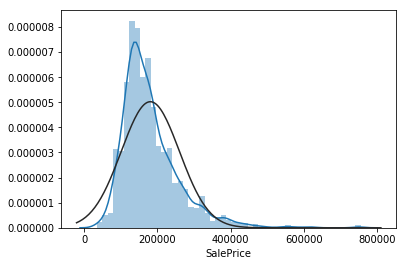

In [1175]:
# Let us first visualize the spread of Target Variable 'Sale Price'
from scipy.stats import norm
sns.distplot(price_dataset['SalePrice'],fit=norm)

From the above plot we can see that the target variable is rightly skewed.

### Bivariate Analysis

In [1176]:
def Ploy_cat(df,i):
        plt.figure(figsize=(15,7))

        plt.subplot(1,2,1)
        plt.title(i+' Histogram')
        plt.xticks(rotation=45)
        sns.countplot(x = i,
              data = price_dataset,
              order =price_dataset[i].value_counts().index)

        plt.subplot(1,2,2)
        
        plt.title(i+' vs SalePrice')
        plt.xticks(rotation=45)
        ax=sns.boxplot(x=df[i], y=df['SalePrice'], palette=("cubehelix"))
        ax.set_ylabel('SalePrice', fontsize=16)
        ax.set_xlabel(i, fontsize=10)

        plt.show()

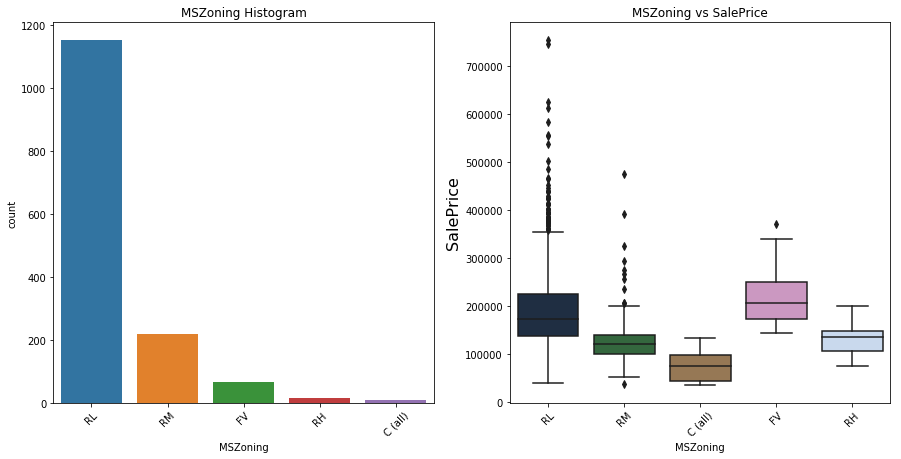

In [1177]:
Ploy_cat(price_dataset,'MSZoning')

Observation:
    
MsZoning can be identfied as the general zoning classification of the sale.

We see that the prices vary a lot for different values and most of the records are for "RL" Residential Low Density properties.


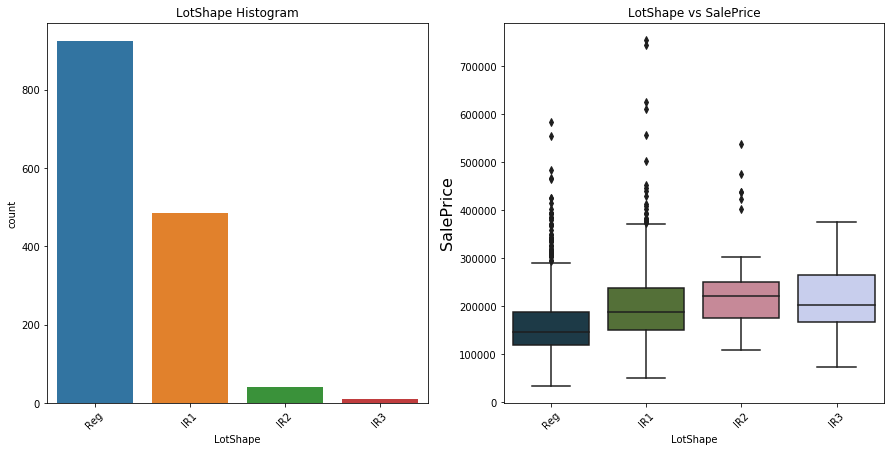

In [1178]:
Ploy_cat(price_dataset,'LotShape')

observation:

LotShape generally identified as the general shape of the property.

Irregular shape of properties have higher selling price than the regular shape of properties.

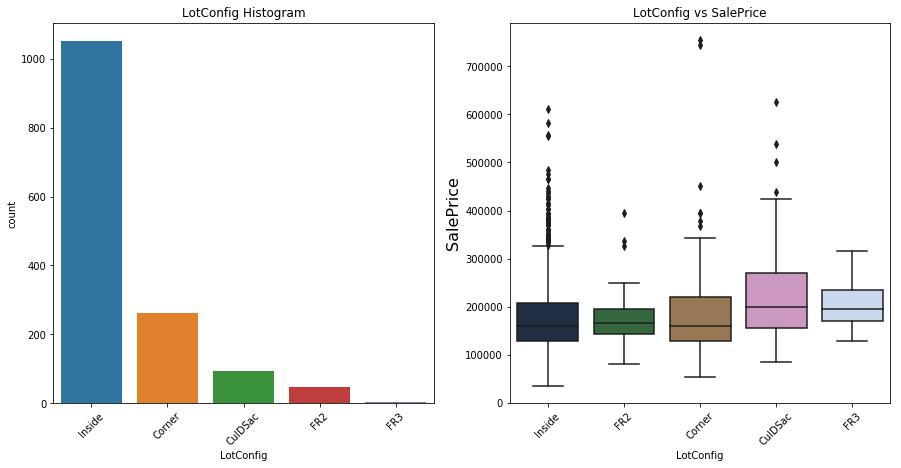

In [1179]:
Ploy_cat(price_dataset,'LotConfig')

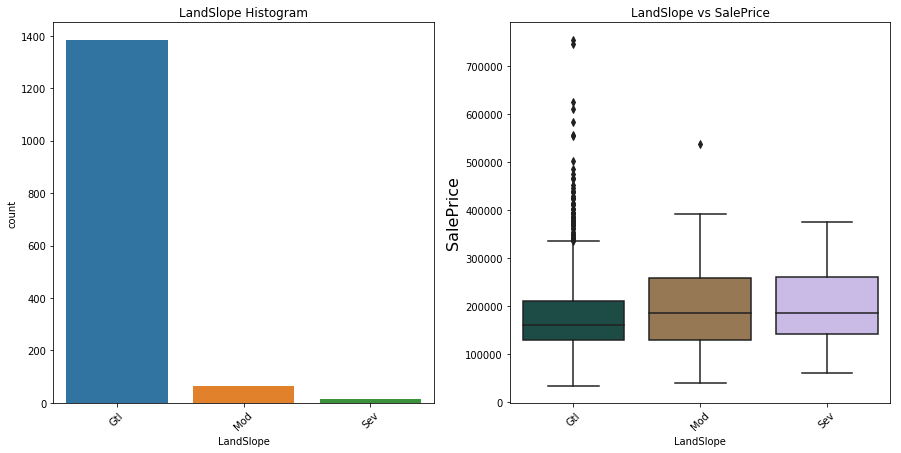

In [1180]:
Ploy_cat(price_dataset,'LandSlope')

### Numerical Data Visualization

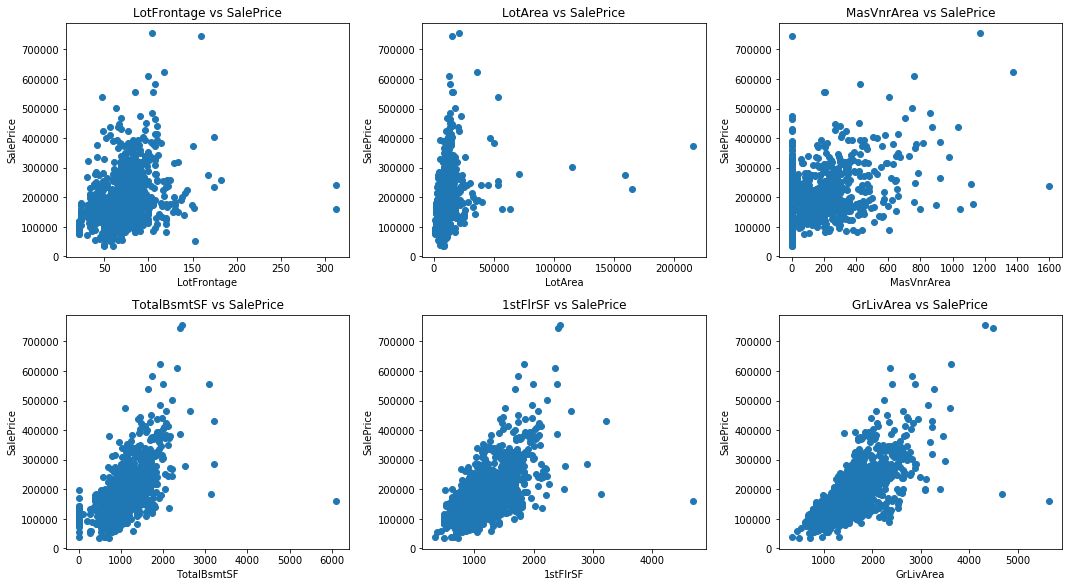

In [1181]:
def scatter(x,fig):
    plt.subplot(5,3,fig)
    plt.scatter(price_dataset[x],price_dataset['SalePrice'])
    plt.title(x+' vs SalePrice')
    plt.ylabel('SalePrice')
    plt.xlabel(x)

plt.figure(figsize=(15,20))

scatter('LotFrontage', 1)
scatter('LotArea', 2)
scatter('MasVnrArea', 3)
scatter('TotalBsmtSF', 4)
scatter('1stFlrSF', 5)
scatter('GrLivArea', 6)

plt.tight_layout()

Observation:
    
- 1stFlrSF,TotalBsmtSF, GrLivArea seems to be showing correlation towards right.

- Rest of the variables are too scattered and hence can be understood during further analysis.

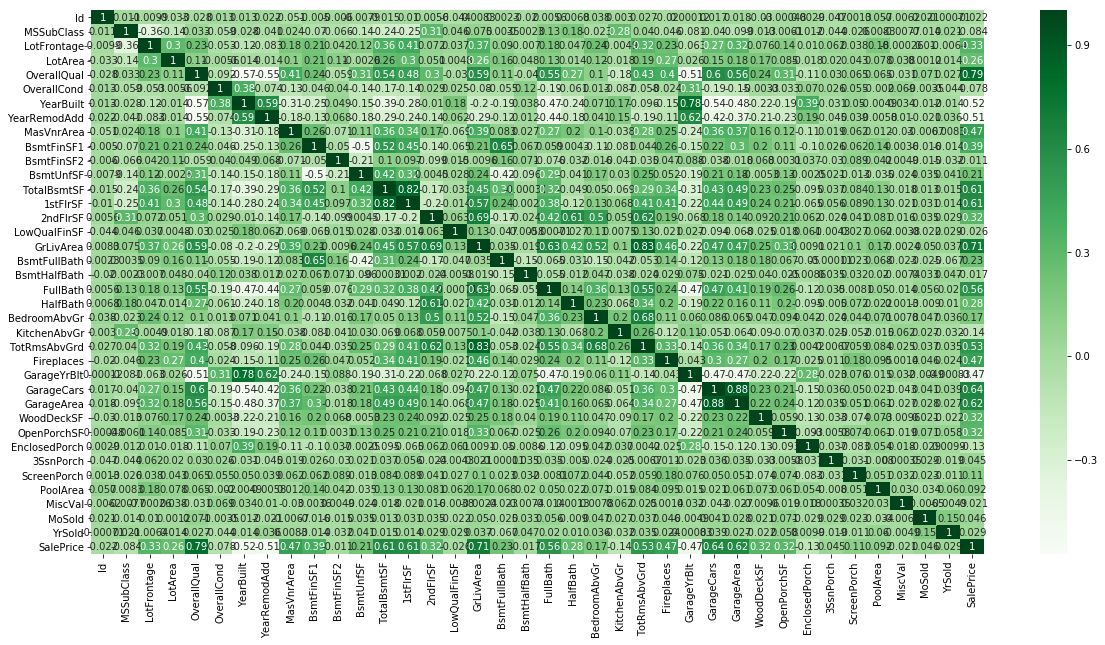

In [1182]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(price_dataset.corr(), annot = True, cmap="Greens")
plt.show()

- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%

In [1183]:
# Removing the highly correlated variables

price_dataset.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

## Step 4: Data Preparation

Converting categorical variable to ordinal numerical variable.

creating dummy variable for continuos variable.



In [1184]:
#converting from int type to object to treat the variables as categorical variables
price_dataset['MSSubClass'] = price_dataset['MSSubClass'].astype('object')


In [1185]:
#Converting categprical variable to continuos variable
price_dataset['CentralAir'] = price_dataset.CentralAir.map({'N':0,'Y':1})
price_dataset['LandSlope'] = price_dataset.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
price_dataset['ExterQual'] = price_dataset.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
price_dataset['BsmtQual'] = price_dataset.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [1186]:
price_dataset.isnull().sum()[price_dataset.isnull().sum()>0]

Series([], dtype: int64)

In [1187]:
import calendar
price_dataset['MonthSold'] = price_dataset['MoSold'].apply(lambda x: calendar.month_name[x])
price_dataset=price_dataset.drop(['MoSold'], axis=1)


In [1188]:
price_dataset = price_dataset.drop(['Id'],axis=1)

#### Creating Dummy variable for categorical variable.

In [1189]:
colmn=[]
for i in price_dataset.describe(include='object').columns:
    # Creating a dummy variable 
    colmn.append(i)
    cont = pd.get_dummies(price_dataset[i],prefix=i,drop_first=True)
    #Adding the results to the master dataframe
    price_dataset = pd.concat([price_dataset,cont],axis=1) 

In [1190]:
#created dummies for the below variables, so drop the same
price_dataset = price_dataset.drop(columns = colmn,axis=1)

In [1191]:
price_dataset.shape

(1460, 251)

## Step 5: Train And Test Split

In [1192]:
# Putting all feature variable to X

X = price_dataset.drop(['SalePrice'], axis=1)
# Putting response variable to y

y = np.log(price_dataset['SalePrice'])
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [1193]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       ...
       'MonthSold_December', 'MonthSold_February', 'MonthSold_January',
       'MonthSold_July', 'MonthSold_June', 'MonthSold_March', 'MonthSold_May',
       'MonthSold_November', 'MonthSold_October', 'MonthSold_September'],
      dtype='object', length=250)

In [1194]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

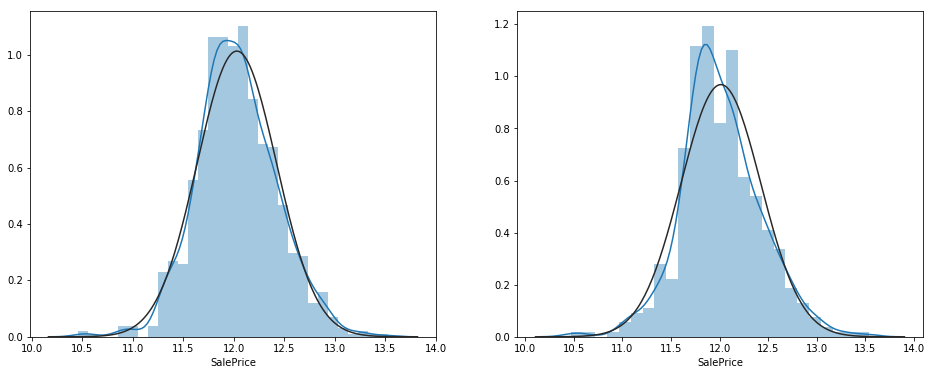

In [1195]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(y_train,fit=norm)
plt.subplot(122)
sns.distplot(y_test,fit=norm)

From the above plot we can observe that the target variable is normally distributed.

## Step 6: Recursive feature elimination (RFE)

In [1196]:

from sklearn.feature_selection import RFE

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,50)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'GarageCars', 'MSSubClass_30', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'BsmtCond_None',
       'BsmtExposure_Gd', 'BsmtExposure_None', 'BsmtFinType1_None',
       'BsmtFinType1_Unf', 'BsmtFinType2_None', 'KitchenQual_Gd',
       'KitchenQual_TA', 'FireplaceQu_None'],
      dtype='obj

In [1197]:
import statsmodels
import statsmodels.api as sm
X_train_new=X_train[col]

X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     201.0
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        21:59:02   Log-Likelihood:                 647.44
No. Observations:                1021   AIC:                            -1211.
Df Residuals:                     979   BIC:                            -1004.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
OverallQual              0.0902      0.008     11.345      0.000       0.075       0.106
OverallCond              0.0462      0.005      9.117      0.000       0.036       0.056
YearBuilt               -0.0515      0.009     -5.503      0.000      -0.070      -0.033
BsmtQual                 0.0384      0.009      4.245      0.000       0.021       0.056
BsmtFinSF1              -0.0163      0.005     -3.045      0.002      -0.027      -0.006
BsmtFinSF2              -0.0020      0.005     -0.435      0.664      -0.011       0.007
BsmtUnfSF                0.0019      0.005      0.369      0.712      -0.008       0.012
TotalBsmtSF             -0.0158      0.007     -2.170      0.030      -0.030      -0.002
CentralAir               0.0243      0.005      5.036      0.000       0.015       0.034
1stFlrSF                 0.0395      0.008      5.134      0.000       0.024       0.055
2ndFlrSF                 0.0353      0.007      5.327      0.000       0.022       0.048
LowQualFinSF             0.0103      0.004      2.333      0.020       0.002       0.019
GrLivArea                0.0593      0.005     11.116      0.000       0.049       0.070
BsmtFullBath             0.0339      0.006      5.814      0.000       0.022       0.045
FullBath                 0.0316      0.007      4.499      0.000       0.018       0.045
HalfBath                 0.0197      0.006      3.191      0.001       0.008       0.032
GarageCars               0.0604      0.006     10.369      0.000       0.049       0.072
MSSubClass_30           -0.0284      0.005     -5.719      0.000      -0.038      -0.019
MSSubClass_90           -0.0072      0.002     -3.085      0.002      -0.012      -0.003
MSSubClass_120         -39.4300      0.014  -2811.633      0.000     -39.458     -39.402
MSSubClass_160         -33.8632      0.012  -2709.363      0.000     -33.888     -33.839
MSSubClass_180         -13.7463      0.006  -2132.867      0.000     -13.759     -13.734
MSZoning_FV              0.0426      0.017      2.579      0.010       0.010       0.075
MSZoning_RH              0.0171      0.008      2.142      0.032       0.001       0.033
MSZoning_RL              0.0733      0.028      2.616      0.009       0.018       0.128
MSZoning_RM              0.0560      0.024      2.290      0.022       0.008       0.104
Neighborhood_ClearCr     0.0194      0.004      4.444      0.000       0.011       0.028
Neighborhood_Crawfor     0.0242      0.004      5.481      0.000       0.016       0.033
Neighborhood_NoRidge     0.0194      0.005      4.205      0.000       0.010       0.029
Neighborhood_NridgHt     0.0310      0.005      6.046      0.000       0.021       0.041
Neighborhood_Somerst     0.0202      0.009      2.264      0.024       0.003       0.038
Neighborhood_StoneBr     0.0271      0.004      6.356    

In [1198]:
# Assign the 70 columns to X_train_rfe

X_train_rfe = X_train[col]

In [1199]:
# Associate the new 50 columns to X_train and X_test for further analysis
#
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [1200]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,200,500,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1201]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019601,0.027812,0.0018,0.000980,0.0001,{'alpha': 0.0001},-0.095157,-0.107853,-0.093554,-0.094754,...,-0.095182,0.007419,27,-0.089653,-0.074461,-0.089677,-0.088872,-0.091347,-0.086802,0.006223
1,0.002800,0.000400,0.0012,0.000400,0.001,{'alpha': 0.001},-0.095156,-0.107852,-0.093554,-0.094754,...,-0.095182,0.007419,26,-0.089653,-0.074461,-0.089677,-0.088872,-0.091347,-0.086802,0.006223
2,0.003200,0.000980,0.0010,0.000632,0.01,{'alpha': 0.01},-0.095154,-0.107850,-0.093553,-0.094753,...,-0.095181,0.007418,25,-0.089652,-0.074461,-0.089677,-0.088871,-0.091346,-0.086802,0.006223
3,0.002600,0.000490,0.0008,0.000400,0.05,{'alpha': 0.05},-0.095145,-0.107838,-0.093551,-0.094746,...,-0.095176,0.007413,24,-0.089651,-0.074458,-0.089676,-0.088869,-0.091344,-0.086800,0.006223
4,0.003600,0.001020,0.0012,0.000400,0.1,{'alpha': 0.1},-0.095134,-0.107824,-0.093549,-0.094738,...,-0.095169,0.007408,23,-0.089648,-0.074455,-0.089674,-0.088867,-0.091341,-0.086797,0.006223


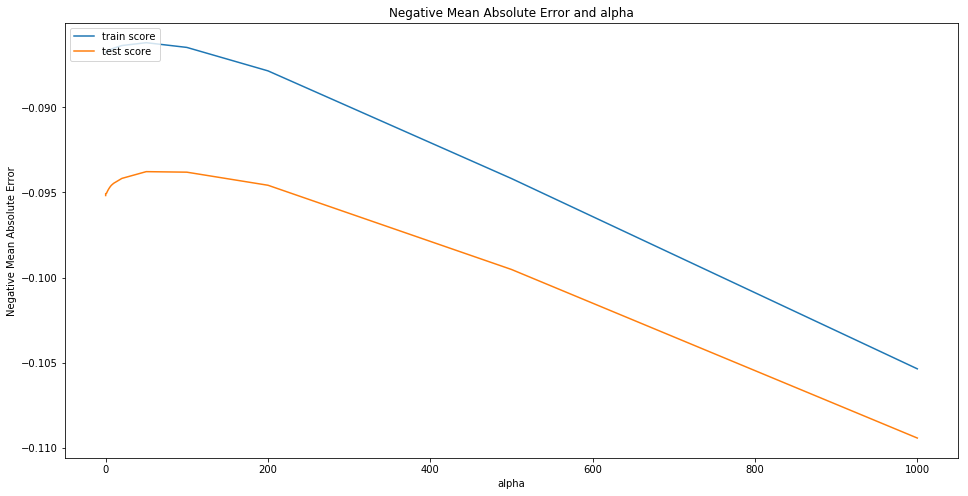

In [1202]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(16,8))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1203]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 50}
-0.09377914303816673


Applying Ridge Regression 

In [1204]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 8.60747880e-02,  4.37010652e-02, -4.64161088e-02,  3.83907517e-02,
       -9.04285037e-03, -6.01312602e-05,  4.28805842e-03, -5.10451020e-03,
        2.59604649e-02,  3.52612314e-02,  3.29609067e-02,  8.69837318e-03,
        5.41273763e-02,  3.10418311e-02,  3.25141009e-02,  2.03175030e-02,
        6.00235480e-02, -2.67956583e-02, -7.14230957e-03, -7.09023623e-03,
       -2.43977539e-02, -1.05436031e-02,  1.39093893e-02,  2.88342081e-03,
        1.73752312e-02,  4.21193548e-03,  1.80395964e-02,  2.34834120e-02,
        1.88030571e-02,  3.06417099e-02,  1.92918335e-02,  2.61456701e-02,
        1.97212633e-02, -7.14230957e-03, -1.73854288e-02, -1.70189827e-02,
        2.39400017e-02,  1.84900809e-02,  3.11680604e-04,  1.51357282e-32,
        3.11680604e-04, -9.52585436e-04,  2.49906765e-02, -9.40298305e-04,
       -9.52585436e-04, -2.30238684e-02, -9.40298305e-04, -1.37368073e-02,
       -3.02588173e-02, -2.93494645e-02])

In [1205]:
from sklearn import metrics
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)


In [1206]:
y_test_pred = ridge.predict(X_test)
print("Trained R2 Score : ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print("Trained R2 Score : ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Trained R2 Score :  0.8926179932065686
Trained R2 Score :  0.8939239018441105


In [1207]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.017995403249653118


In [1208]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,OverallQual,12.024418
1,OverallCond,0.086075
17,MSSubClass_30,0.060024
13,BsmtFullBath,0.054127
2,YearBuilt,0.043701
4,BsmtFinSF1,0.038391
10,2ndFlrSF,0.035261
11,LowQualFinSF,0.032961
15,HalfBath,0.032514
14,FullBath,0.031042


In [1209]:
len(ridge_coef[ridge_coef.Coef!=0])

50

Apllying Lasso Regression

In [1210]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1211]:
cv_results = pd.DataFrame(model_cv_l.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.059203,0.007054,0.0010,1.168008e-07,5e-05,{'alpha': 5e-05},-0.095031,-0.107753,-0.093520,-0.094569,...,-0.095106,0.007371,3,-0.089596,-0.074429,-0.089623,-0.088804,-0.091273,-0.086745,0.006210
1,0.046003,0.001898,0.0012,4.000187e-04,0.0001,{'alpha': 0.0001},-0.094907,-0.107653,-0.093496,-0.094393,...,-0.095035,0.007322,2,-0.089545,-0.074400,-0.089576,-0.088741,-0.091202,-0.086693,0.006198
2,0.010601,0.002059,0.0008,4.000187e-04,0.001,{'alpha': 0.001},-0.093018,-0.106688,-0.093362,-0.092971,...,-0.094349,0.006800,1,-0.089124,-0.074672,-0.088938,-0.087969,-0.090576,-0.086256,0.005852
3,0.042803,0.075607,0.0014,4.899014e-04,0.008,{'alpha': 0.008},-0.092713,-0.113035,-0.099294,-0.094552,...,-0.097730,0.008325,4,-0.092567,-0.079686,-0.093025,-0.092999,-0.093773,-0.090410,0.005376
4,0.003800,0.000748,0.0008,4.000425e-04,0.01,{'alpha': 0.01},-0.095246,-0.114519,-0.101903,-0.096520,...,-0.099814,0.008142,5,-0.094894,-0.081741,-0.095339,-0.095812,-0.096355,-0.092828,0.005565


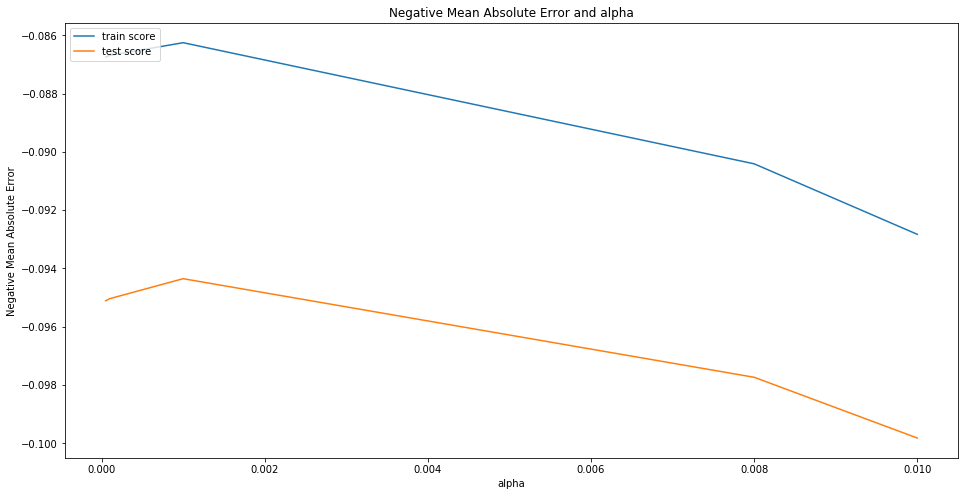

In [1212]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.figure(figsize=(16,8))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1213]:
#checking the value of optimum number of parameters
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.001}
-0.09434935339067967


In [1214]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Trained R2 Score",metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print("Trained R2 Score",metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

Trained R2 Score 0.8926429370789603
Trained R2 Score 0.8930243615834275


In [1215]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [1216]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,OverallQual,12.024432
13,BsmtFullBath,0.101303
1,OverallCond,0.092763
17,MSSubClass_30,0.061156
2,YearBuilt,0.045416
4,BsmtFinSF1,0.038923
14,FullBath,0.031448
30,Neighborhood_Somerst,0.029417
15,HalfBath,0.028882
37,Exterior1st_BrkFace,0.027478


In [1217]:
len(lasso_coef[lasso_coef.Coef!=0])

41

### If we compare two models then we will know that the accuracy of lasso model is slightly higher than the ridge model. but as lasso will penalize more on the dataset and can also help in feature elemination i am goint to consider that as my final model.

### Final Model

In [1219]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8926429370789603
0.8930243615834275


After compairing both the model we can see that the below Features are most imporatant features best explaining the DataSet

# Featuere	Coef

	OverallQual	12.024432

	BsmtFullBath	0.101303

	OverallCond	0.092763

	MSSubClass_30	0.061156

	YearBuilt	0.045416

	BsmtFinSF1	0.038923

	FullBath	0.031448

	Neighborhood_Somerst	0.029417

	HalfBath	0.028882

	Exterior1st_BrkFace	0.027478

Best alpha value for Lasso : {'alpha': 0.001}
    
Best alpha value for Ridge : {'alpha': 50}